In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import mse, rmse
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
#display options
pd.options.display.float_format = '{:.3f}'.format

In [33]:
#load dataset
df_books = pd.read_csv('books.csv', error_bad_lines=False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [34]:
df_books[df_books['ratings_count'] == 0].count() / len(df_books) * 100

bookID               0.831
title                0.831
authors              0.831
average_rating       0.831
isbn                 0.831
isbn13               0.831
language_code        0.831
# num_pages          0.831
ratings_count        0.831
text_reviews_count   0.831
dtype: float64

In [35]:
#some light cleaning to remove books with 0 ratings - and thus a  0 score average
df = df_books.loc[df_books.ratings_count > 0]
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.560,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.490,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.470,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.410,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.550,043965548X,9780439655484,eng,435,2149872,33964


In [36]:
#some light cleaning to remove books with 0 ratings - and thus a  0 score average
df = df_books.loc[df_books.ratings_count > 0]
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.560,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.490,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.470,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.410,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.550,043965548X,9780439655484,eng,435,2149872,33964


In [37]:
df = df.rename(columns={'# num_pages' : 'num_pages'})

In [38]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,13600.000,13600.000,13600.000,13600.000,13600.000,13600.000
mean,22139.436,3.941,9763864919500.477,342.981,17914.313,538.105
std,13695.912,0.298,400432318562.004,252.664,113417.935,2539.111
min,1.000,1.000,8987059752.000,0.000,1.000,0.000
25%,10606.750,3.770,9780345470443.000,197.000,88.000,8.000
50%,21282.500,3.960,9780596527376.500,302.000,650.500,41.000
75%,33279.750,4.130,9780940450023.000,422.000,4808.250,225.250
max,47709.000,5.000,9790007672386.000,6576.000,5629932.000,93619.000


In [39]:
df.language_code.value_counts()

eng      10512
en-US     1699
spa        407
en-GB      340
ger        232
fre        202
jpn         63
por         27
mul         21
ita         18
zho         15
grc         10
en-CA        9
nl           7
rus          7
swe          6
glg          4
tur          3
cat          3
lat          3
enm          3
ara          2
nor          1
wel          1
dan          1
msa          1
heb          1
gla          1
ale          1
Name: language_code, dtype: int64

In [40]:
df.isnull().sum() / len(df) * 100

bookID               0.000
title                0.000
authors              0.000
average_rating       0.000
isbn                 0.000
isbn13               0.000
language_code        0.000
num_pages            0.000
ratings_count        0.000
text_reviews_count   0.000
dtype: float64

In [41]:
#change some of the language codes
df['language_code'] = df['language_code'].apply(lambda x: 'eng' if x[:2] == 'en' else x)

This all seems pretty clean! Let's do some feature engineering and then some EDA!

In [42]:
df.language_code.value_counts()

eng    12563
spa      407
ger      232
fre      202
jpn       63
por       27
mul       21
ita       18
zho       15
grc       10
nl         7
rus        7
swe        6
glg        4
cat        3
lat        3
tur        3
ara        2
nor        1
msa        1
wel        1
dan        1
gla        1
heb        1
ale        1
Name: language_code, dtype: int64

In [43]:
cont_cols = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']

In [44]:
import scipy.stats as stats

The coefficient is 1.0


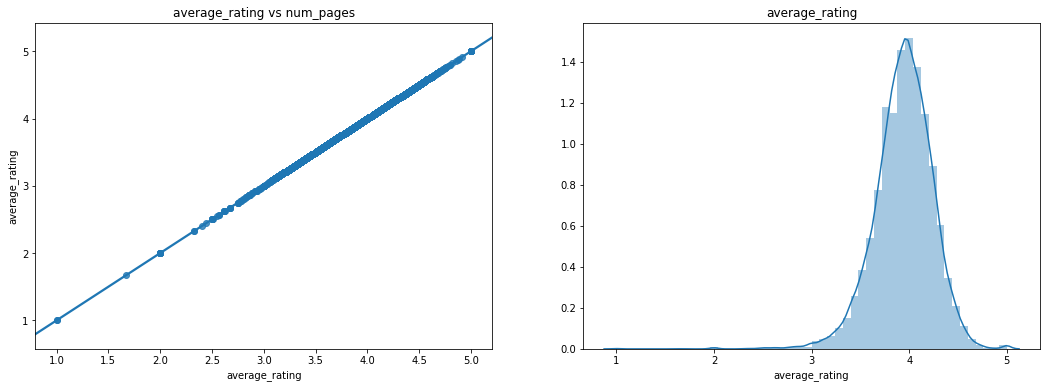

The coefficient is 0.18651475035478998


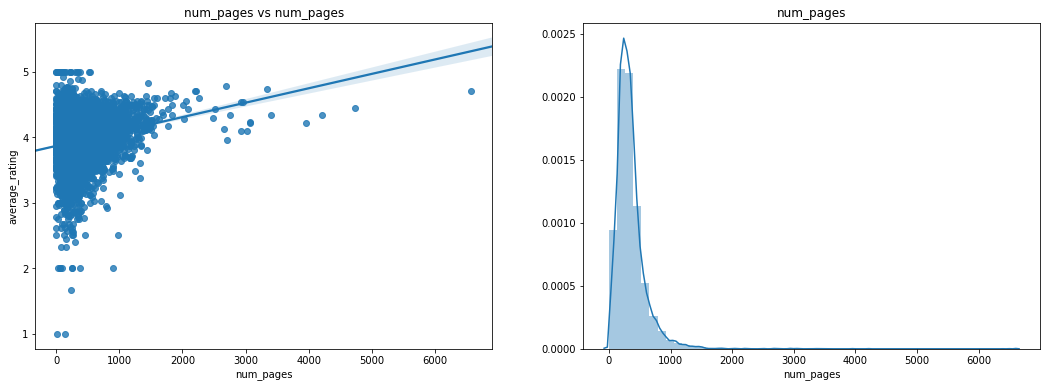

The coefficient is 0.04439386123945926


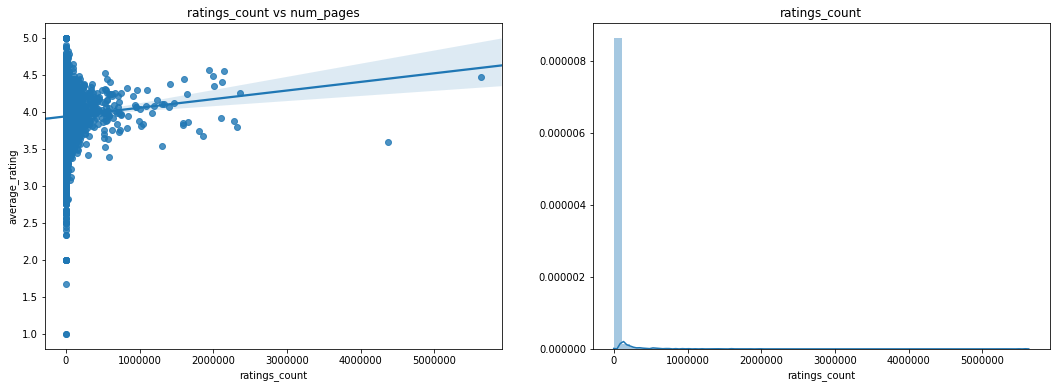

The coefficient is 0.03707451314798128


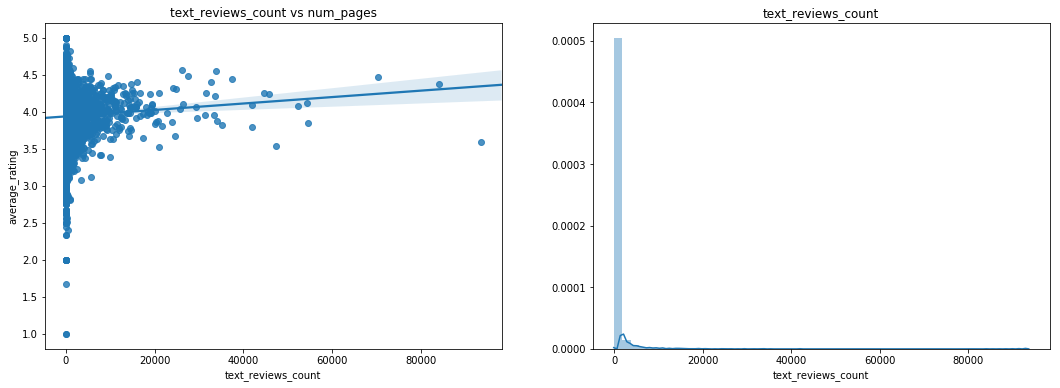

In [45]:
for column in cont_cols:
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 2, 1)
    corr, p_value = stats.pearsonr(df['average_rating'], df[column])
    print('The coefficient is {}'.format(corr))
    sns.regplot(x=column, y='average_rating', data=df)
    plt.title('{} vs num_pages'.format(column))
    
    plt.subplot(1, 2, 2)
    sns.distplot(df[column])
    plt.title('{}'.format(column))
    
    plt.show()

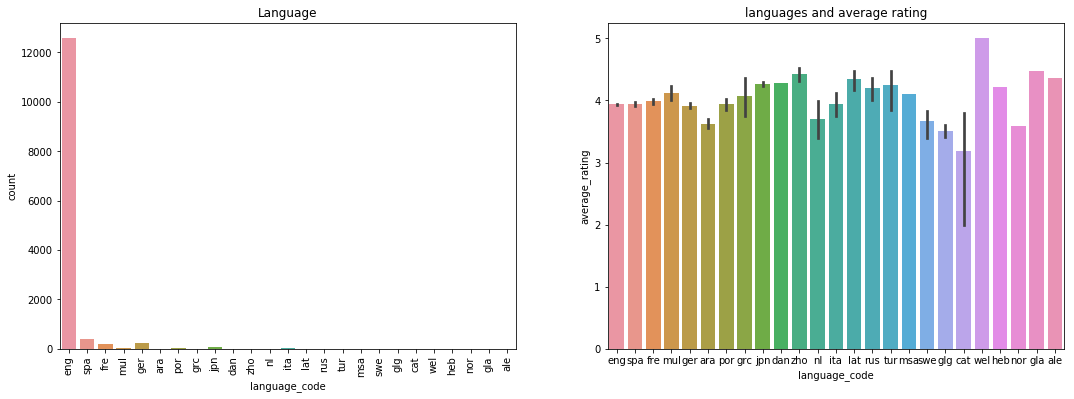

In [46]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.countplot(df['language_code'])
plt.xticks(rotation='vertical')
plt.title('Language')

plt.subplot(1, 2, 2)
sns.barplot(x='language_code', y='average_rating', data=df)
plt.title('languages and average rating')
plt.show()

## Feature Engineering

In [47]:
#title length
df['title_length'] = df.title.apply(lambda x: len(x))

#create something for number of authors

In [48]:
df['title_length'].describe()

count   13600.000
mean       34.631
std        23.108
min         2.000
25%        18.000
50%        29.000
75%        46.000
max       254.000
Name: title_length, dtype: float64

0.14942796208702105


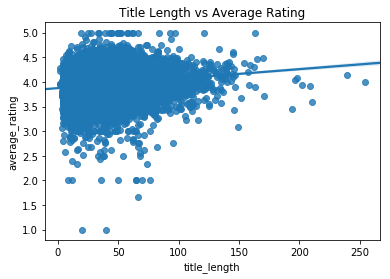

In [52]:
sns.regplot(x='title_length', y='average_rating', data=df)
corr, p_value = stats.pearsonr(df['average_rating'], df['title_length'])
print(corr)
plt.title('Title Length vs Average Rating')
plt.show()

In [50]:
df['author_count'] = df['authors'].apply(lambda x: len(x.split('-')))

0.02547972902165589


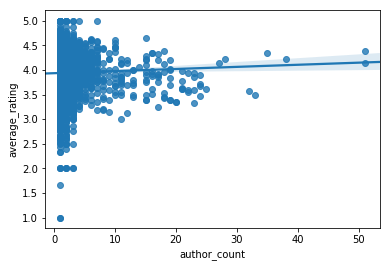

In [51]:
sns.regplot(x='author_count', y='average_rating', data=df)
corr, p_value = stats.pearsonr(df['average_rating'], df['author_count'])
print(corr)
plt.show()

Yikes, these are some really crappy features. We can still build models off of these and compare the effects of the two.....

We'll use average_rating as our target. Here we go!

## OLS regression model

In [53]:
dummies = pd.get_dummies(df.language_code, drop_first=True)
features = ['num_pages', 'ratings_count', 'text_reviews_count', 'title_length', 'author_count']

X = pd.concat([dummies, df[features]], axis=1)
Y = df['average_rating']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [55]:
import statsmodels.api as sm
# We add constant to the model as it's a best practice
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         average_rating   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     29.96
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          2.04e-157
Time:                        14:16:32   Log-Likelihood:                -1813.1
No. Observations:               10880   AIC:                             3686.
Df Residuals:                   10850   BIC:                             3905.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1979      0

C:\Users\Jmich\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


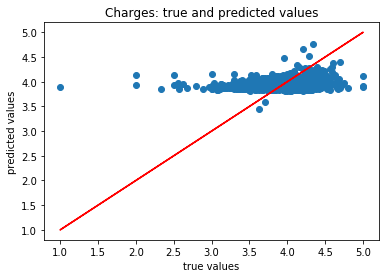

Mean squared error of the prediction is: 0.08343731012285047
Root mean squared error of the prediction is: 0.28885517153558193


In [56]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))

Let's try again, but only use the features we find the most significant.

In [57]:
dummy2 = dummies[['swe', 'cat', 'glg']]
X = pd.concat([df[['num_pages', 'ratings_count', 'title_length']], dummy2], axis=1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [59]:
import statsmodels.api as sm
# We add constant to the model as it's a best practice
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         average_rating   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     110.3
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          1.72e-135
Time:                        14:19:51   Log-Likelihood:                -1910.9
No. Observations:               10880   AIC:                             3836.
Df Residuals:                   10873   BIC:                             3887.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.8079      0.006    620.760

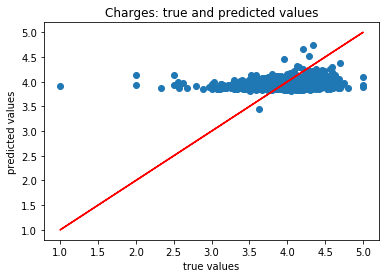

Mean squared error of the prediction is: 0.08443001512867607
Root mean squared error of the prediction is: 0.2905684345015406


In [60]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))


Well, our RMSE increased and our r-squared slightly decreased. So this model doesn't perform well at all!

This is not a great model! Let's see how KNN compares, but I don't have high hopes...

## KNN

In [61]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler


knn = neighbors.KNeighborsRegressor(n_neighbors=10)

X = df[['num_pages', 'ratings_count', 'text_reviews_count', 'title_length', 'author_count']]
Y = df['average_rating']

In [62]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

C:\Users\Jmich\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Without weights

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=10)

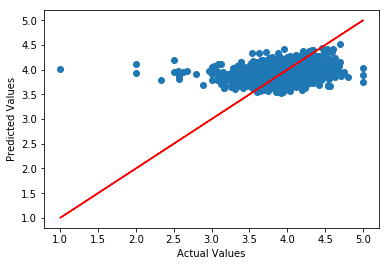

Mean squared error of the prediction is: 0.08443001512867607
Root mean squared error of the prediction is: 0.2905684345015406


In [64]:
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))

## With weights

In [65]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = df[['num_pages', 'ratings_count', 'text_reviews_count', 'title_length', 'author_count']]
Y = df['average_rating']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=10)

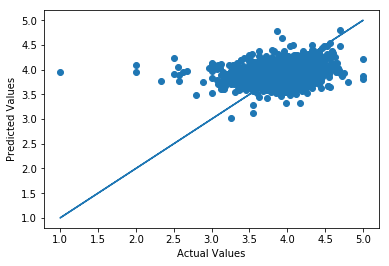

Mean squared error of the prediction is: 0.08443001512867607
Root mean squared error of the prediction is: 0.2905684345015406


In [66]:
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))

So, it seems that the KNN and OLS perform almost identical. Is this due to the data set, an incorrect usage on my part, or some other reason?